In [2]:
pip install catboost

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pandas.core.computation.check import NUMEXPR_INSTALLED
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

C:\Users\parig\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [8]:
df=pd.read_csv(r"C:\Users\parig\OneDrive\Desktop\NITW\interns 25\p project\cleaned_sleep.csv")

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,Normal
2,Male,28,Doctor,6.2,6,65,8,Normal,125/80,75,Normal
3,Male,28,Sales Representative,5.9,4,31,8,Obese,140/90,85,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,Sleep Apnea


In [10]:
num = [feature for feature in df.columns if df[feature].dtype != 'O']
cat= [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(num), num))
print('\nWe have {} categorical features : {}'.format(len(cat), cat))

We have 6 numerical features : ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']

We have 5 categorical features : ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [11]:
print("Categories in 'Gender' variable: ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Occupation' variable: ",end=" ")
print(df['Occupation'].unique())

print("Categories in'BMI Category' variable:",end=" " )
print(df['BMI Category'].unique())

print("Categories in 'Blood Pressure' variable: ",end=" " )
print(df['Blood Pressure'].unique())

print("Categories in 'Sleep Disorder' variable: ",end=" " )
print(df['Sleep Disorder'].unique())

Categories in 'Gender' variable:  ['Male' 'Female']
Categories in 'Occupation' variable:  ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Categories in'BMI Category' variable: ['Overweight' 'Normal' 'Obese']
Categories in 'Blood Pressure' variable:  ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '114/75'
 '115/78' '119/77' '121/79' '125/82' '135/90' '122/80' '134/90' '140/95'
 '142/92' '139/91' '118/75']
Categories in 'Sleep Disorder' variable:  ['Normal' 'Sleep Apnea' 'Insomnia']


In [12]:
y=df['Sleep Duration']

In [13]:
y

0      6.1
1      6.2
2      6.2
3      5.9
4      5.9
      ... 
299    8.1
300    8.0
301    8.1
302    8.1
303    8.1
Name: Sleep Duration, Length: 304, dtype: float64

In [18]:
X=df.drop(columns=['Sleep Duration'],axis=1)

In [19]:
X.head()

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,Normal
1,Male,28,Doctor,6,60,8,Normal,125/80,75,Normal
2,Male,28,Doctor,6,65,8,Normal,125/80,75,Normal
3,Male,28,Sales Representative,4,31,8,Obese,140/90,85,Sleep Apnea
4,Male,28,Sales Representative,4,30,8,Obese,140/90,85,Sleep Apnea


**To create a coloumn transformer**

In [20]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X.shape

(304, 51)

**To split the data into training and test**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((243, 51), (61, 51))

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Elastic Net Regressor":ElasticNet(random_state=0)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    try:
        print(f"Training model: {model_name}")
        model.fit(X_train, y_train)  # Train model
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
        model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

        print(model_name)
        model_list.append(model_name)

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('=' * 35)
        print('\n')
    except Exception as e:
        print(f"Error training model {model_name}: {e}")
        continue

Training model: Linear Regression
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1119
- Mean Absolute Error: 0.0829
- R2 Score: 0.9800
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2136
- Mean Absolute Error: 0.1188
- R2 Score: 0.9258


Training model: Lasso
Lasso
Model performance for Training set
- Root Mean Squared Error: 0.7905
- Mean Absolute Error: 0.6888
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7903
- Mean Absolute Error: 0.6916
- R2 Score: -0.0164


Training model: Ridge
Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1751
- Mean Absolute Error: 0.1332
- R2 Score: 0.9509
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1903
- Mean Absolute Error: 0.1436
- R2 Score: 0.9411


Training model: K-Neighbors Regressor
Error training model K-Neighbors Regressor: 'N

In [42]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,CatBoosting Regressor,0.988826
3,Decision Tree,0.987128
4,Random Forest Regressor,0.986838
5,XGBRegressor,0.985282
7,AdaBoost Regressor,0.971269
2,Ridge,0.941079
0,Linear Regression,0.925773
8,Elastic Net Regressor,0.254012
1,Lasso,-0.016357


**Based on this information, the CatBoosting Regressor model works best for the data**

In [34]:
cat_model = CatBoostRegressor(verbose=False)
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.88


**Plot between actual and predicted data**

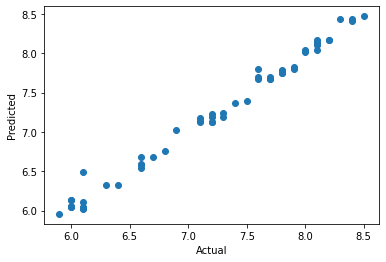

In [35]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

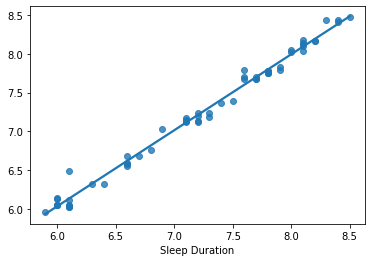

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None);

**Difference between actual and predicted values**

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
180,7.8,7.752324,0.047676
154,6.8,6.762833,0.037167
111,7.1,7.139139,-0.039139
247,6.1,6.048222,0.051778
60,6.1,6.026181,0.073819
...,...,...,...
218,6.0,6.128783,-0.128783
104,7.3,7.191207,0.108793
301,8.1,8.105124,-0.005124
194,6.4,6.326206,0.073794


- Seems like the data has been overfit in this model as it has very high accuracy.
- Linear regressor also seems to overfit the data as Mean Squared error of training model is 11% and MSE of test model is 21%. This indicates that model doesnt perform as well on the test data as training data probly due to an overfit.
- Ridge model seem to be best model to predict the sleep duration on analysing.

In [47]:
r_model = Ridge(fit_intercept=True)
r_model = r_model.fit(X_train, y_train)
y_pred = r_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.11


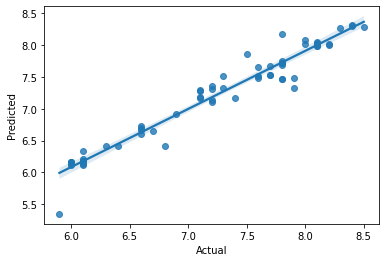

In [48]:
sns.regplot(x=y_test,y=y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [49]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
180,7.8,7.724220,0.075780
154,6.8,6.412817,0.387183
111,7.1,7.173810,-0.073810
247,6.1,6.210261,-0.110261
60,6.1,6.116706,-0.016706
...,...,...,...
218,6.0,6.157803,-0.157803
104,7.3,7.326639,-0.026639
301,8.1,8.053340,0.046660
194,6.4,6.414386,-0.014386
